<a href="https://colab.research.google.com/github/Tttec/Inf003/blob/master/Hakan_Car_Prices_edited_CY_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries


In [4]:
!pip install seaborn

In [5]:
import numpy as np                  # Scientific computing
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt     # plot graphs
import matplotlib.lines as mlines
import sklearn.datasets
import h5py                         # work with dataset stored in H5 files
import scipy                        # use your own pictures
from PIL import Image               # use your own pictures
from scipy import ndimage
from scipy.special import expit     # expit is the sigmoid function

#from lr_utils import load_dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Code to upload csv file in colab. (Dataset)

In [6]:
#from google.colab import files
#uploaded = files.upload()

In [7]:
datas=pd.read_csv('car_dataset.csv')
#Dataset:https://www.kaggle.com/doaaalsenani/usa-cers-dataset

Adding some visualisation code to better understand dataset

In [8]:
datas.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [9]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


In [10]:
datas.describe()

,Unnamed: 0,price,year,mileage,lot
count,2499.000000,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,1249.000000,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,721.543484,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,624.500000,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,1249.000000,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,1873.500000,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,2498.000000,84900.000000,2020.000000,1.017936e+06,1.678055e+08


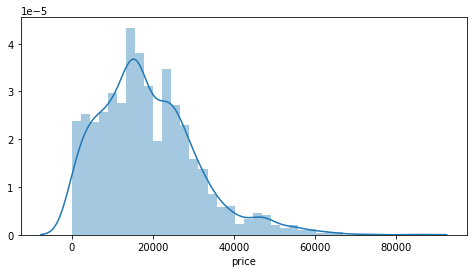

In [11]:
plt.figure(figsize=(8,4))
sns.distplot(datas['price'])

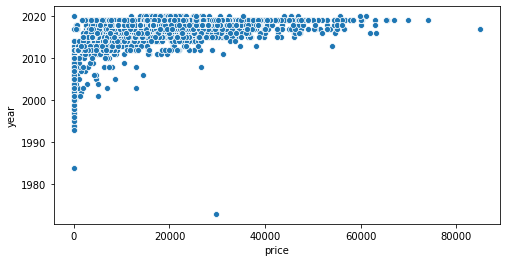

In [12]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='price',y='year',data=datas)

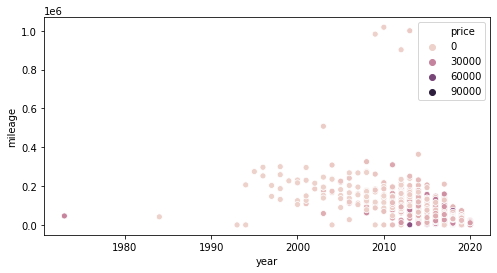

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="year",y="mileage",data=datas,hue="price")

In [14]:
datas.corr()
# TODO: How to read corraletaion matrix?

,Unnamed: 0,price,year,mileage,lot
Unnamed: 0,1.000000,0.098417,0.244921,-0.129258,0.012577
price,0.098417,1.000000,0.418274,-0.400838,0.159369
year,0.244921,0.418274,1.000000,-0.594686,0.164582
mileage,-0.129258,-0.400838,-0.594686,1.000000,-0.130475
lot,0.012577,0.159369,0.164582,-0.130475,1.000000


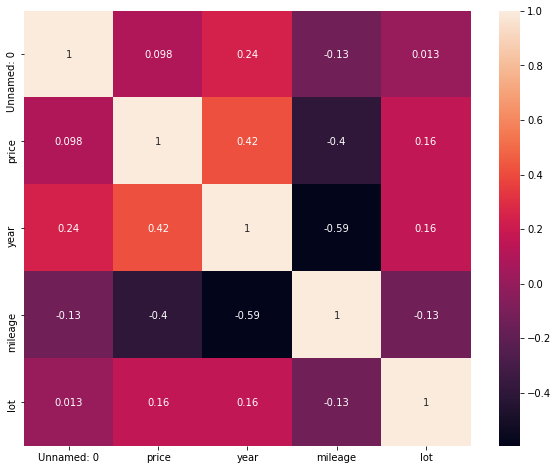

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(datas.corr(), annot=True)

-Making some adjustments on retrieved data

---


-Here i eliminated some of the columns because i thought the dataset would be 
better without those columns since they can hardly give information and are hard to deal with. The columns i want to use are price, brand, model, year, title_status, mileage, color and state. 

In [16]:
#print(datas) To check if data has read properly and it has so i comment this line of code

price=datas.iloc[:,1:2].values
brand=datas.iloc[:,2:3].values
model=datas.iloc[:,3:4].values
year=datas.iloc[:,4:5].values
title_status=datas.iloc[:,5:6].values
mileage=datas.iloc[:,6:7].values
color=datas.iloc[:,7:8].values
state=datas.iloc[:,10:11].values
#Checking the shapes and individual columns
print("Shape of Dataframe: ", datas.shape)
print("Shape of brand: ", brand.shape)
print("Shape of price: ", price.shape)
print(brand)

#CY: Toplam kaç farklı brand var gibi bilgileri bastırman iyi olur. Pandas'ın bunun için fonksiyonları var.
# her stütunda toplam kaç farklı değer var, ve her birinden toplam kaç tane var gibi bilgiler...
# şu sayfadakine benzer bir data analizi iyi/gerekli:
# https://medium.com/analytics-vidhya/house-price-prediction-regression-with-tensorflow-keras-4fc49fae7123

# price = 0 olan datalar var, bunlar hatalı değil mi? Öğrenmeyi bozacaklarsa, temizlenmeleri iyi olabilir?

Shape of Dataframe:  (2499, 13)
Shape of brand:  (2499, 1)
Shape of price:  (2499, 1)
[['toyota']
 ['ford']
 ['dodge']
 ...
 ['nissan']
 ['nissan']
 ['nissan']]


Since all columns are seperated and ready to work i transform categorichal values into numerical values.(brand, title_status_color, model, state)

In [17]:
from sklearn.preprocessing import LabelEncoder # Label Encoder : non-numerical values  >  numerical values
le = LabelEncoder()
brand_le = le.fit_transform(brand[:,0]).reshape(-1,1)
print(brand_le) #to check if transform applied correctly
title_status_le= le.fit_transform(title_status[:,0]).reshape(-1,1)
color_le=le.fit_transform(color[:,0]).reshape(-1,1)
model_le=le.fit_transform(model[:,0]).reshape(-1,1)
state_le=le.fit_transform(state[:,0]).reshape(-1,1)

[[27]
 [ 8]
 [ 7]
 ...
 [24]
 [24]
 [24]]


Onehotencoding


In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
brand_ohe=ohe.fit_transform(brand).toarray()
print(brand_ohe)
title_status_ohe=ohe.fit_transform(title_status).toarray()
color_ohe=ohe.fit_transform(color).toarray()
model_ohe=ohe.fit_transform(model).toarray()
state_ohe=ohe.fit_transform(state).toarray()
# There are 28 brands
i = 5
print(brand_ohe.shape)
print(brand[i,:])     # Brand as a string
print(brand_le[i,:])   # Brand to integer
print(brand_ohe[i,:])   # Integer to Onehot encoding
# CY: değişken isimlerini her defasında değiştirmek daha iyi olur.
# Aynı kutuyu tekrar çalıştırırsam, onehot encoded olan brand değişkenine tekrar onehote encoding uygulanıyor.

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2499, 28)
['dodge']
[7]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Data after Preprocessing

Make new dataframe with the preprocessed columns with the help of concat function and split data2 into 2 for test and train

In [19]:
brand_df=pd.DataFrame(data=brand_ohe)
print(brand_df.shape)
title_status_df=pd.DataFrame(data=title_status_ohe)
color_df=pd.DataFrame(data=color_ohe)
model_df=pd.DataFrame(data=model_ohe)
state_df=pd.DataFrame(data=state_ohe)
mileage_df=pd.DataFrame(data=mileage)
year_df=pd.DataFrame(data=year)
price_df=pd.DataFrame(data=price)
data2=pd.concat([brand_df,model_df,title_status_df,color_df,state_df,year_df,mileage_df], axis=1)
print(data2.shape)
print(data2.shape[0], " samples with ", data2.shape[1], " features each; one sample per row!")

(2499, 28)
(2499, 252)
2499  samples with  252  features each; one sample per row!


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2,price,test_size=0.25, random_state=1) #Random state

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape[0], " training samples; one sample per row:")
print(x_train)
print(price_df)

(1874, 252)
(1874, 1)
(625, 252)
(625, 1)
1874  training samples; one sample per row:
       0    1    2    3    4    5    6   ...   39   40   41   42   43    0        0 
675   0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  15524.0
1125  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  19983.0
1162  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  26899.0
664   0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2017  20784.0
885   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2014  44468.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...      ...
960   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  26443.0
905   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2018  42909.0
1096  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2014  98699.0
235   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0

In [22]:
print(x_test.shape[0], " training samples; one per row")
print(x_test)

625  training samples; one per row
       0    1    2    3    4    5    6   ...   39   40   41   42   43    0        0 
1384  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2018  21592.0
620   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  16106.0
107   0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2017  19117.0
1781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2017  32284.0
1592  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019   9278.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...      ...
1649  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  2019  24783.0
1027  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  20944.0
1292  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2019  15787.0
161   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  2016  33514.0
389   0.0  0.0  0.0  0.0  0.0 

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
#modelc.add(keras.Input(shape=(252,)))
model.add(layers.Dense(50, activation="relu", input_shape=(252,)))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(1))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                12650     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 22,851
Trainable params: 22,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy']
              )

# CY: sparse_categorical_crossentropy: 
# https://www.dlology.com/blog/how-to-use-keras-sparse_categorical_crossentropy/

# CY: Direkt fiyatı Output olarak veren bir model kullanman, onu çalışır hale getirmen daha doğru olur.
# Problemin doğasına aykırı bir output şekli bu.

In [29]:
# CY: history ekledim.
history = model.fit(x_train,y_train,epochs=300)

# CY: https://medium.com/analytics-vidhya/house-price-prediction-regression-with-tensorflow-keras-4fc49fae7123
# Bu sayfada model.fit() kullanımına bakarsan, validation data kullanmış.
# Verini %75 / %15 / %10 = Train / Validation / Test olarak ayırmayı deneyebilirsin.
# TODO: Validation data ne için önemli?
# TODO: Training esnasında loss düşüyor mu? Accuracy artıyor mu? history kullanarak görüntülemek önemli!

Epoch 1/300
59/59 [==============================] - 0s 3ms/step - loss: 77080312.0000 - accuracy: 0.0000e+00
Epoch 2/300
59/59 [==============================] - 0s 3ms/step - loss: 71685128.0000 - accuracy: 0.0000e+00
Epoch 3/300
59/59 [==============================] - 0s 3ms/step - loss: 78749336.0000 - accuracy: 0.0000e+00
Epoch 4/300
59/59 [==============================] - 0s 3ms/step - loss: 76333720.0000 - accuracy: 0.0000e+00
Epoch 5/300
59/59 [==============================] - 0s 3ms/step - loss: 76795664.0000 - accuracy: 0.0000e+00
Epoch 6/300
59/59 [==============================] - 0s 3ms/step - loss: 75300112.0000 - accuracy: 0.0000e+00
Epoch 7/300
59/59 [==============================] - 0s 3ms/step - loss: 84757424.0000 - accuracy: 0.0000e+00
Epoch 8/300
59/59 [==============================] - 0s 3ms/step - loss: 85457784.0000 - accuracy: 0.0000e+00
Epoch 9/300
59/59 [==============================] - 0s 3ms/step - loss: 74521400.0000 - accuracy: 0.0000e+00
Epoch 10/3

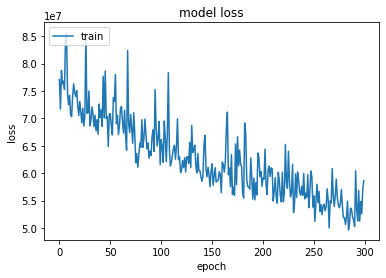

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history_c.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test)
mean_absolute_error(y_test,predictions)

5462.020383984375

In [32]:
(mean_squared_error(y_test,predictions))

53035282.047462285